iris데이터셋을 이용
1. 정규화
2. train, test
3. class 기반 딥러닝
4. 학습간 정확도 출력
5. test set 0번째 행 예측값 확인
6. 검증
- train, test f1 score
- confusion matrix, heat map

In [1]:
import torch
from torch.optim import Adam
from torch.nn import Linear, MSELoss, Sequential, Sigmoid, Softmax, ReLU, Module
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch.nn.functional as F
import seaborn as sb

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, accuracy_score, precision_score
from sklearn.model_selection import train_test_split

import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
iris = load_iris()

In [3]:
df = pd.DataFrame( iris['data'] )
df.columns = iris['feature_names']
df['species'] = iris['target']
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


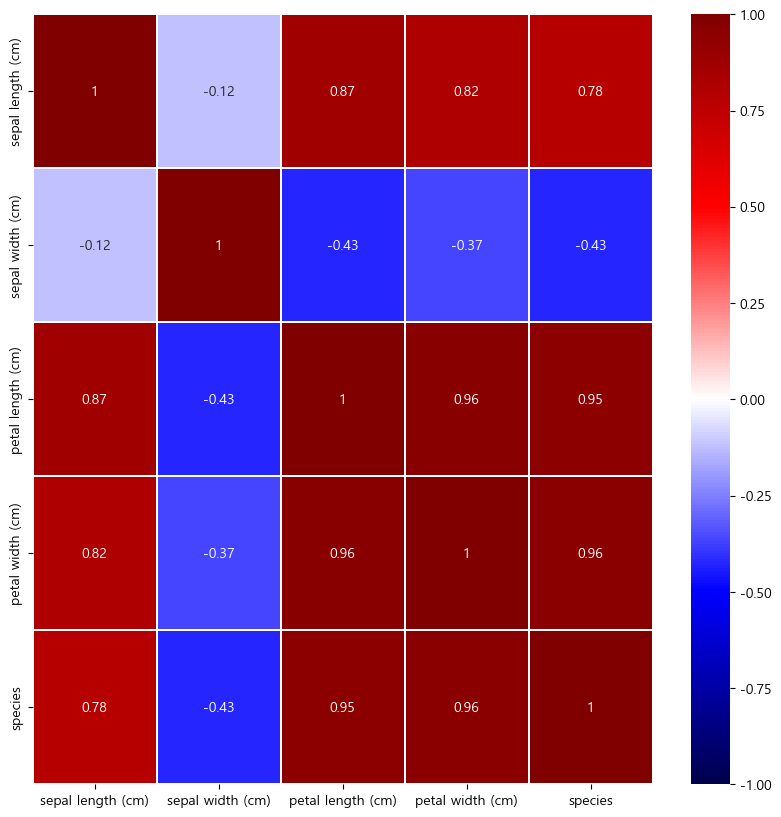

In [4]:
plt.figure(figsize=(10,10))
sb.heatmap( df.corr(), vmin=-1, vmax=1, annot=True,
           linewidths=0.2, cmap='seismic' )
plt.show()

In [5]:
x_data = df.iloc[:,:-1].values
y_data = pd.get_dummies( df['species'] ).values

### 1. 정규화

In [6]:
scaleF = MinMaxScaler()
x_dataN = scaleF.fit_transform( x_data )

### 2. Train set, test set

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x_dataN, y_data, test_size=0.3, stratify=y_data)

In [25]:
x = torch.FloatTensor( x_dataN)
y = torch.FloatTensor( y_data)
feature_len = x.shape[1]
label_len = y.shape[1]
print('feature_len:', feature_len, ', label_len:', label_len)

feature_len: 4 , label_len: 3


### 3. Class 기반 딥러닝

In [9]:
class ClassificationModel(Module):
    def __init__(self, feat_len, label_len):
        super().__init__() # 초기화작업
        self.nn1 = Linear(feat_len, 20)
        self.leru1 = ReLU()
        self.nn2 = Linear(20, label_len)
        self.soft2 = Softmax(dim=1)
    
    def forward(self, x):
        print('forward call')
#         x = self.nn1.forward(x)
        x = self.nn1(x) # matmul(x, w1) + b1  w1:2x20
        x = self.leru1(x) # 1/1+e^-z
        x = self.nn2(x) # matmul(x, w2) + b2  w2:20x1
        x = self.soft2(x)
        return x    

In [10]:
model = ClassificationModel(feature_len, label_len)
loss_fn = torch.nn.CrossEntropyLoss()

### 4. 학습간 정확도 출력

In [11]:
optimizer = Adam( model.parameters(), lr=0.1)
hist=[]
for epoch in range(100):
    optimizer.zero_grad()
    hx = model.forward(x) 
    # z = torch.matmul(x,w)+b
    # hx = Sigmoid(z)
    cost = loss_fn(hx,y)
    cost.backward()
    optimizer.step()
    print('----------------------------')
    rdata = y.argmax(dim=1).numpy()
    pred = hx.argmax(dim=1).numpy()
    print('정확도', accuracy_score(rdata, pred))    
    print(epoch, cost.item())
    hist.append(cost.item())

forward call
----------------------------
정확도 0.3333333333333333
0 1.111884355545044
forward call
----------------------------
정확도 0.3333333333333333
1 1.075857162475586
forward call
----------------------------
정확도 0.68
2 1.0278276205062866
forward call
----------------------------
정확도 0.6666666666666666
3 0.9443960785865784
forward call
----------------------------
정확도 0.6666666666666666
4 0.8723306059837341
forward call
----------------------------
정확도 0.6666666666666666
5 0.8266115188598633
forward call
----------------------------
정확도 0.7333333333333333
6 0.7831636667251587
forward call
----------------------------
정확도 0.9066666666666666
7 0.7511789798736572
forward call
----------------------------
정확도 0.9466666666666667
8 0.723379909992218
forward call
----------------------------
정확도 0.9
9 0.7027313113212585
forward call
----------------------------
정확도 0.94
10 0.6769744157791138
forward call
----------------------------
정확도 0.9466666666666667
11 0.6639565229415894
forward call

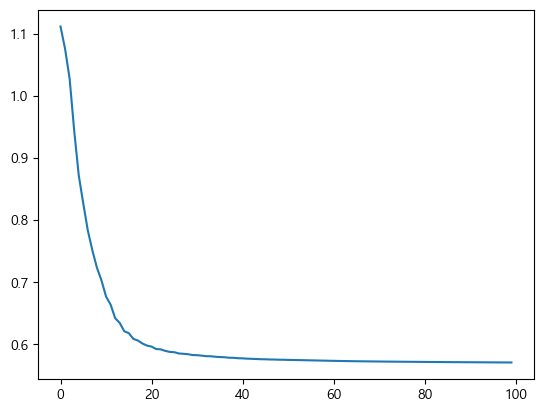

In [12]:
plt.plot( hist)
plt.show()

### 5. Test 데이터 0번째 행 예측값 확인

In [13]:
test_pred_y0 = model( torch.FloatTensor(x_test[0].reshape(1,feature_len) )).argmax(dim=1)
test_pred_y0

forward call


tensor([1])

In [14]:
test_true_y0 = y[0].argmax(dim=0)
test_true_y0

tensor(0)

### 6. 검증
- Train, test f1_score

In [15]:
train_y_pred = model( torch.FloatTensor(x_train)).argmax(dim=1)
train_y_pred

forward call


tensor([1, 0, 0, 0, 0, 1, 2, 2, 1, 0, 2, 1, 0, 0, 2, 0, 1, 0, 2, 1, 1, 2, 0, 2,
        0, 2, 1, 1, 0, 2, 2, 1, 1, 0, 1, 2, 2, 1, 0, 2, 0, 1, 1, 0, 0, 1, 0, 2,
        1, 0, 2, 2, 0, 0, 1, 0, 1, 2, 0, 0, 1, 2, 0, 2, 2, 1, 1, 0, 0, 0, 1, 0,
        2, 0, 1, 1, 2, 2, 1, 2, 2, 0, 2, 1, 2, 0, 0, 1, 2, 1, 2, 1, 1, 2, 1, 1,
        2, 1, 1, 2, 2, 0, 2, 2, 0])

In [16]:
train_y_true = y_train.argmax(axis=1)
train_y_true

array([1, 0, 0, 0, 0, 1, 2, 2, 1, 0, 2, 1, 0, 0, 2, 0, 1, 0, 2, 1, 1, 2,
       0, 2, 0, 2, 1, 1, 0, 2, 2, 1, 1, 0, 1, 2, 2, 1, 0, 2, 0, 1, 1, 0,
       0, 1, 0, 2, 1, 0, 2, 2, 0, 0, 1, 0, 1, 2, 0, 0, 1, 2, 0, 2, 2, 1,
       1, 0, 0, 0, 1, 0, 2, 0, 1, 1, 2, 2, 1, 2, 2, 0, 2, 1, 2, 0, 0, 1,
       2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 0, 2, 2, 0], dtype=int64)

#### Train set f1_score

In [17]:
f1_score(train_y_true, train_y_pred, average='macro')

1.0

In [18]:
test_y_pred = model( torch.FloatTensor(x_test)).argmax(dim=1)
test_y_pred

forward call


tensor([1, 2, 2, 2, 2, 1, 0, 1, 0, 2, 2, 1, 1, 1, 2, 2, 0, 2, 0, 0, 0, 1, 1, 1,
        2, 0, 0, 1, 1, 0, 1, 0, 1, 0, 2, 0, 0, 2, 2, 2, 1, 1, 2, 0, 0])

In [19]:
test_y_true = y_test.argmax(axis=1)
test_y_true

array([1, 2, 2, 2, 2, 1, 0, 2, 0, 2, 2, 1, 1, 1, 2, 2, 0, 2, 0, 0, 0, 1,
       1, 1, 2, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 2, 2, 2, 1, 1, 2, 0,
       0], dtype=int64)

#### Train set confusion_matrix and heatmap

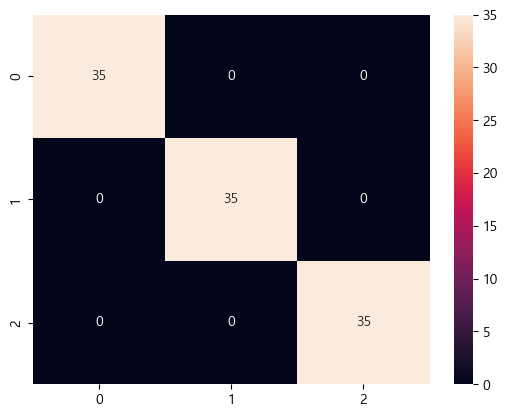

In [20]:
train_con_mat = confusion_matrix(train_y_true, train_y_pred)
sb.heatmap(train_con_mat, annot=True)
plt.show()

#### Test set f1_score

In [21]:
f1_score(test_y_true, test_y_pred, average='macro')

0.9555555555555556

#### Test set confusion_matrix and heatmap


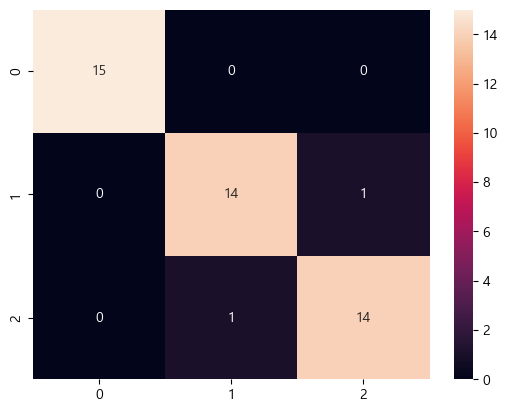

In [22]:
test_con_mat = confusion_matrix(test_y_true, test_y_pred)
sb.heatmap(test_con_mat, annot=True)
plt.show()